0.0
0.1999999999990898
0.2999999999986347


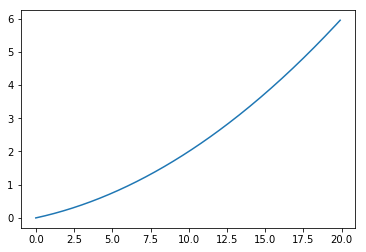

In [22]:
#학습 - 훈련데이터로부터 가중치 매개변수의 최적값을 자동으로 획득하는 것
#신경망 학습 지표 - 손실함수
#손실함수의 결괏값을 가장 작게 만드는 가중치 매개변수를 찾는것이 학습의 목표
#학습 - 가중치 값을 데이터를 보고 자동으로 결정

#사람이 개입한 SIFT, SURF, HOG 등의 특징 - SVM, KNN 등으로 학습
#신경망은 이미지에 포함된 특성까지 기계가 스스로 학습
#딥러닝 종단간 기계 학습 end-to-end machine learning
#손실함수 일반적으로 평균 제곱 오차와 cross entropy 오차 사용 성능 나쁨 지표
#MSE mean squared error 
def mean_squared_error(y,t):
    return 0.5*np.sum((y-t)**2)

#Cross entropy error CEE
def cross_entropy_error(y,t):
    delta=1e-7
    reurn -np.sum(t*np.log(y+delta))
    
#미니배치에서 손실함수의 합 평균

#손실함수 미분값을 단서로 매개변수 갱신 미분값 음수 손실함수의 값을 줄일 수 있다
#정확도를 단서로 삼으면 대부분의 위치에서 매개변수를 조금바꿔도 정확도가 달라지지 않아서 미분값이 0 이된다 그래서 손실함수 미분값을 단서로 삼는다.
#sigmoid 함수 미분값 0 아니어서 신경망을 학습할 수 있다

#수치 미분numerical differentiation 함수를 프로그래밍하면 반올림 오차로 문제를 일으킨다
#수식을 전개해 미분하는것 해석적 해, 해석적 미분 analytic
import numpy as np
np.float32(1e-50)

np.float32(1e-4)
#중심차분 중앙 차분 
def numerical_diff(f,x):
    h=10e-50
    return (f(x+h)-f(x))/h

def numerical_diff1(f,x):
    h=1e-4
    return (f(x+h)-f(x-h))/(2*h)
def func(x):
    return 0.01*x**2+0.1*x


print(numerical_diff(func,5))
print(numerical_diff1(func,5))
print(numerical_diff1(func,10))



x=np.arange(0,20,0.1)
y=func(x)
import matplotlib.pylab as plt
plt.plot(x,y)
plt.show()

No handles with labels found to put in legend.


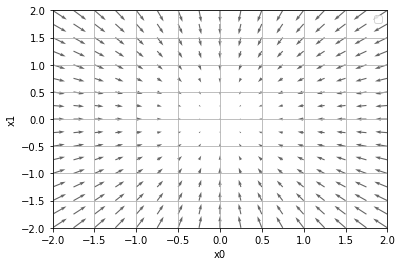

In [43]:

import numpy as np
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D
#모든 변수의 편미분을 벡터로 정리한 것 - 기울기
def _numerical_gradient_no_batch(f, x):
    h=1e-4
    grad=np.zeros_like(x)
    

    for idx in range(x.size):
        tmp_val=x[idx]
        
        x[idx]=float(tmp_val)+h
        fxh1=f(x)
        
        x[idx]=tmp_val-h
        fxh2=f(x)
        
        grad[idx]= (fxh1-fxh2) /(2*h)
        x[idx]=tmp_val
        
    return grad
    
    

def numerical_gradient(f, X):
    if X.ndim == 1:
        return _numerical_gradient_no_batch(f, X)
    else:
        grad = np.zeros_like(X)
        
        for idx, x in enumerate(X):
            grad[idx] = _numerical_gradient_no_batch(f, x)
        
        return grad

def numerical_gradient(f, X):
    if X.ndim == 1:
        return _numerical_gradient_no_batch(f, X)
    else:
        grad = np.zeros_like(X)
        
        for idx, x in enumerate(X):
            grad[idx] = _numerical_gradient_no_batch(f, x)
        
        return grad


def function_2(x):
    if x.ndim == 1:
        return np.sum(x**2)
    else:
        return np.sum(x**2, axis=1)


def tangent_line(f, x):
    d = numerical_gradient(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y
     
if __name__ == '__main__':
    x0 = np.arange(-2, 2.5, 0.25)
    x1 = np.arange(-2, 2.5, 0.25)
    X, Y = np.meshgrid(x0, x1)
    
    X = X.flatten()
    Y = Y.flatten()
    
    grad = numerical_gradient(function_2, np.array([X, Y]) )
    
    plt.figure()
    plt.quiver(X, Y, -grad[0], -grad[1],  angles="xy",color="#666666")#,headwidth=10,scale=40,color="#444444")
    plt.xlim([-2, 2])
    plt.ylim([-2, 2])
    plt.xlabel('x0')
    plt.ylabel('x1')
    plt.grid()
    plt.legend()
    plt.draw()
    plt.show()

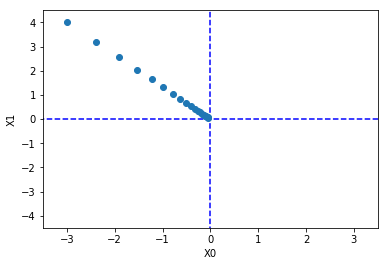

In [49]:
#gradient method 경사법 기울기를 구하고 기울어진 방향으로 나아가기를 반복 함수값을 점차 줄이는 것 경사법
#learning rate 학습률 한번의 학습으로 얼마만큼 학습해야할지, 매개변수 값을 얼마나 갱신하느냐
# coding: utf-8
import numpy as np
import matplotlib.pylab as plt



def numerical_gradient(f, X):
    if X.ndim == 1:
        return _numerical_gradient_no_batch(f, X)
    else:
        grad = np.zeros_like(X)
        
        for idx, x in enumerate(X):
            grad[idx] = _numerical_gradient_no_batch(f, x)
        
        return grad

def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    x_history = []

    for i in range(step_num):
        x_history.append( x.copy() )

        grad = numerical_gradient(f, x)
        x -= lr * grad

    return x, np.array(x_history)


def function_2(x):
    return x[0]**2 + x[1]**2

init_x = np.array([-3.0, 4.0])    

lr = 0.1
step_num = 20
x, x_history = gradient_descent(function_2, init_x, lr=lr, step_num=step_num)

plt.plot( [-5, 5], [0,0], '--b')
plt.plot( [0,0], [-5, 5], '--b')
plt.plot(x_history[:,0], x_history[:,1], 'o')

plt.xlim(-3.5, 3.5)
plt.ylim(-4.5, 4.5)
plt.xlabel("X0")
plt.ylabel("X1")
plt.show()


In [13]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
from common.functions import softmax, cross_entropy_error
from common.gradient import numerical_gradient

#sys.path

class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2,3) # 정규분포로 초기화

    def predict(self, x):
        return np.dot(x, self.W)

    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)

        return loss

x = np.array([0.6, 0.9])
t = np.array([0, 0, 1])

net = simpleNet()
#print(net.W)
f = lambda w: net.loss(x, t) #lambda w(인자):표현식
dW = numerical_gradient(f, net.W) #손실함수에, network Weight에 대한 numerical_gradient 계산
print("net loss",net.loss(x,t))
print("weight :",net.W)
print("predict :",net.predict(x))
print("dw result : ",dW) #gradient 결과값 h만큼 weight를 이동하면 dw 만큼의 변화가 생긴다 그래서 손실함수를 줄이는 방향 : - 방향이 되도록 +h, -h

#가중치와 편향을 훈련 데이터에 적응하도록 조정하는 과정을 학습이라 한다
#1 minibatch 훈련 데이터중 일부를 무작위로 가져온다
#2 기울기 산출 각 가중치 매개변수의 기울기 구하기 - 손실 함수의 값을 가장 작게하는 방향
#3 매개변수 갱신 가중치 매개변수를 기울기 방향으로 아주 조금 갱신
#4 1~3단계 반복
#데이터 미니배치로 무작위 선정 - 확률적 경사 하강법 stochastic gradient descent SGD



net loss 0.24049059515573218
weight : [[-3.08230129  0.04722662  1.08501345]
 [ 0.21825103 -1.71870902 -0.26545739]]
predict : [-1.65295485 -1.51850215  0.41209642]
dw result :  [[ 0.05982284  0.06843198 -0.12825482]
 [ 0.08973426  0.10264797 -0.19238223]]


train_size:  60000 batch_size :  100
600.0
train acc, test acc | 0.09871666666666666, 0.098
{'W2': array([[-1.41782784e-02, -1.19065133e-03, -6.38427567e-03,
        -5.48617529e-03,  1.13039370e-02,  1.22118724e-02,
        -2.25768739e-03, -6.27301667e-03, -4.90569206e-03,
         1.71599674e-02],
       [ 4.29257064e-03, -4.21090193e-03,  2.53494181e-03,
         2.07120839e-03,  1.00047426e-02,  9.33623326e-03,
        -5.37178332e-03, -3.43951256e-02, -1.10592813e-02,
         2.67973955e-02],
       [-6.15449460e-03, -4.09644170e-04,  3.81051809e-03,
        -8.38831739e-03,  9.50244161e-03,  6.64223492e-03,
        -6.18689927e-03, -2.79355486e-02,  4.12879499e-03,
         2.49909144e-02],
       [-3.48716671e-03, -1.56303043e-03,  5.23375576e-03,
        -1.07491732e-02,  1.12958516e-02,  9.07649894e-03,
         8.64522887e-03, -3.54322908e-02, -7.07222111e-03,
         2.40525471e-02],
       [-9.85430946e-03, -1.48368839e-03, -3.08853679e-03,
        -8.20068644e-03,  6.81

train acc, test acc | 0.7970833333333334, 0.804
train acc, test acc | 0.8761833333333333, 0.8799
train acc, test acc | 0.8963166666666667, 0.8992
train acc, test acc | 0.9077666666666667, 0.9101
train acc, test acc | 0.9152166666666667, 0.9159
train acc, test acc | 0.9207833333333333, 0.921
train acc, test acc | 0.92455, 0.9254
train acc, test acc | 0.9292166666666667, 0.9299
train acc, test acc | 0.93155, 0.9312
train acc, test acc | 0.9346833333333333, 0.9349
train acc, test acc | 0.9379, 0.9382
train acc, test acc | 0.9397333333333333, 0.9404
train acc, test acc | 0.9422666666666667, 0.9433
train acc, test acc | 0.9442, 0.9426
train acc, test acc | 0.9460333333333333, 0.945
train acc, test acc | 0.9472833333333334, 0.9459


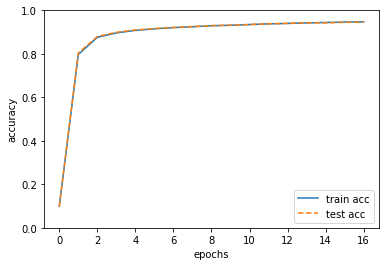

In [13]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
from common.functions import *
from common.gradient import numerical_gradient

import matplotlib.pyplot as plt
from dataset.mnist import load_mnist

class TwoLayerNet:

    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        # 가중치 초기화
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
    
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        return y
        
    # x : 입력 데이터, t : 정답 레이블
    def loss(self, x, t):
        y = self.predict(x)
        
        return cross_entropy_error(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
        
    # x : 입력 데이터, t : 정답 레이블
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads
        
    def gradient(self, x, t):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        grads = {}
        
        batch_num = x.shape[0]
        
        # forward
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        # backward test결과랑 실제 정답 비교해서 
        dy = (y - t) / batch_num
        grads['W2'] = np.dot(z1.T, dy)
        grads['b2'] = np.sum(dy, axis=0)
        
        da1 = np.dot(dy, W2.T)
        dz1 = sigmoid_grad(a1) * da1
        grads['W1'] = np.dot(x.T, dz1)
        grads['b1'] = np.sum(dz1, axis=0)

        return grads


    

# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

# 하이퍼파라미터
iters_num = 10000  # 반복 횟수를 적절히 설정한다.
train_size = x_train.shape[0]
batch_size = 100   # 미니배치 크기
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

print("train_size: ",train_size,"batch_size : ",batch_size)
#train data 갯수는 60000개, batch_size 는 100,그래서 iter_per_epoch 은 600
# 1에폭당 반복 수 100개의 mini_batch로 600 번 반복한다
iter_per_epoch = max(train_size / batch_size, 1)
print(iter_per_epoch)
for i in range(iters_num):
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size) #randno.choice로 100개 씩 선정해서 
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 기울기 계산
    #grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)
    if i==600:
        print(grad)
    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    # 1에폭당 정확도 계산
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

# 그래프 그리기
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()
    

In [4]:
#numerical_gradient 수치미분 loss function 미분해서 값 작아지도록 하는 방향으로 계산
#back propagation 오차역전파법
#계산그래프 역전파를 통해 미분을 효율적으로 계산
#연쇄 법칙 합성함수의 미분 - 각 함수의 미분의 곱으로 나타낼 수 있다
# 수치미분과 해석적 방법 
# 오차역전파법 

aaa 10


In [2]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
from dataset.mnist import load_mnist
from ch05.two_layer_net import TwoLayerNet

# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

x_batch = x_train[:3]
t_batch = t_train[:3]

grad_numerical = network.numerical_gradient(x_batch, t_batch)
grad_backprop = network.gradient(x_batch, t_batch)

# 각 가중치의 절대 오차의 평균을 구한다.
for key in grad_numerical.keys():
    diff = np.average( np.abs(grad_backprop[key] - grad_numerical[key]) )
    print(key + ":" + str(diff))


W1:4.4117427102959836e-10
b1:2.6508226483144695e-09
W2:4.810831726626837e-09
b2:1.3959378687700141e-07


In [4]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)

import numpy as np
from dataset.mnist import load_mnist
from ch05.two_layer_net import TwoLayerNet

# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

iters_num = 10000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 기울기 계산
    #grad = network.numerical_gradient(x_batch, t_batch) # 수치 미분 방식
    grad = network.gradient(x_batch, t_batch) # 오차역전파법 방식(훨씬 빠르다)
    
    # 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print(train_acc, test_acc)


0.10363333333333333 0.1038
0.9031833333333333 0.9071
0.9267833333333333 0.929
0.9354833333333333 0.9366
0.9443 0.9437
0.9504833333333333 0.9493
0.9561 0.9531
0.95925 0.9543
0.9635 0.957
0.9641 0.9577
0.96785 0.9612
0.9703666666666667 0.9642
0.9717333333333333 0.9653
0.9732333333333333 0.9656
0.9763 0.968
0.9763666666666667 0.9672
0.9779 0.9689


In [ ]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
from common.layers import *
from common.gradient import numerical_gradient
from collections import OrderedDict


class TwoLayerNet:

    def __init__(self, input_size, hidden_size, output_size, weight_init_std = 0.01):
        # 가중치 초기화
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size) 
        self.params['b2'] = np.zeros(output_size)

        # 계층 생성
        self.layers = OrderedDict()
        self.layers['Affine1'] = Affine(self.params['W1'], self.params['b1'])
        self.layers['Relu1'] = Relu()
        self.layers['Affine2'] = Affine(self.params['W2'], self.params['b2'])

        self.lastLayer = SoftmaxWithLoss()
        
    def predict(self, x):
        for layer in self.layers.values():
            x = layer.forward(x)
        
        return x
        
    # x : 입력 데이터, t : 정답 레이블
    def loss(self, x, t):
        y = self.predict(x)
        return self.lastLayer.forward(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        if t.ndim != 1 : t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
        
    # x : 입력 데이터, t : 정답 레이블
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads
        
    def gradient(self, x, t):
        # forward
        self.loss(x, t)

        # backward
        dout = 1
        dout = self.lastLayer.backward(dout)
        
        layers = list(self.layers.values())
        layers.reverse()
        for layer in layers:
            dout = layer.backward(dout)

        # 결과 저장
        grads = {}
        grads['W1'], grads['b1'] = self.layers['Affine1'].dW, self.layers['Affine1'].db
        grads['W2'], grads['b2'] = self.layers['Affine2'].dW, self.layers['Affine2'].db

        return grads


In [ ]:
#가중치 매개변수의 최적값을 탐색하는 방법
#가중치 매개변수 초깃값
#하이퍼파라미터 설정방법
# 오버피팅 대응책 가중치 감소와 dropout, normalization -> batch normalization

In [7]:
#optimization 손실함수의 값을 가능한한 낮추는 매개변수 찾는 것 - 최적화 optimization
class SGD:
    def __init__(self, lr=0.1):
        self.lr=lr
    
    def update(self, paramsm, grads):
        for key in params.keys():
            params[key] -=self.lr * grads[key]

#params, grad dictionary 변수 연관 배열, 해시 key - value 한 쌍을 갖는 자료형
#params['W1'] 같은 방법으로 가중치 매개변수와 기울기 저장 anisotripy 함수  비등방성 방향에 따라 성질, 기울기 달라지는 함수
#Momentunm, AdaGad, Adam

class Momentum:
    def __init__(self,lr=0.01, momentum=0.9):
        self.lr=lr
        self.momentum=momentum
        self.v=None
        

    def update(self,params,grads):
        if self.v is None:
            self.v={}
            for key, val in params.items():
                self.v[key]=np.zeros_like(val)
        for key in params.keys():
            self.v[key]=self.momentum*self.v[key]-self.lr.grads[key]
            params[key]+=self.v[key]
#학습률 learning rate 학습률 감소 - learning rate decay 학습률을 조금씩 작게 한다
#매개변수 전체의 학습률 값을 일괄적으로 낮추는 것 기존의 기울기 값을 제곱해서 계속 더해주기 많이 움직인 원소는 학습률이 나자지는것
#Adagrad 학습을 진행할 수록 갱신 강도가 약해진다 - 계속 학습하면 어느순간 0만큼 갱신 learning rate - RMSProp 과거의 모든 기울기 더하는게 아니라 먼 과거는 잊고 새로운 기울기 저도만 방형
#EMA Exponential Moving Average 

class Adagrad:
    def __init__(self, lr=0.01):
        self.lr=lr
        self.h=None
        
    def update(self,params,grads):
        if self.h is None:
            self.h={}
            for key,val in params.items():
                self.h[key]=np.zeros_like(val)
            for key in params.keys():
                self.h[key]+=grads[key]*grads[key]
                params[key]-=self.lr*grads[key]/(np.sqrt(self.h[key])+1e-7) #0으로 나누는 것 방지
#Adagrad 학습률 감소 처음 시작하는 LR에서 점점 작아지도록   
#Adam momentum + Adagrad 모멘텀에서 방향 가속도 붙이고 Adagrad 에서 learning rate 조정했던것 합쳐서 Adam
#2015 Adam https://arxiv.org/pdf/1412.6980.pdf
            
            


===========iteration:0===========
SGD:2.384879536957407
Momentum:2.2831832386823585
AdaGrad:2.2300120992847003
Adam:2.1281806059756083
===========iteration:100===========
SGD:1.5495884298259504
Momentum:0.3811909670928182
AdaGrad:0.1851001064586842
Adam:0.25604298971436346
===========iteration:200===========
SGD:0.7353184830951303
Momentum:0.27872233722406264
AdaGrad:0.14830126436890445
Adam:0.21978804753482822
===========iteration:300===========
SGD:0.44072698748593075
Momentum:0.18833151107617618
AdaGrad:0.08945612164625885
Adam:0.11915325331642185
===========iteration:400===========
SGD:0.4433813716982127
Momentum:0.17471226213604976
AdaGrad:0.09773734658573334
Adam:0.1791932275867634
===========iteration:500===========
SGD:0.4124724018732756
Momentum:0.1959755056786342
AdaGrad:0.07464760083341343
Adam:0.13547280239367657
===========iteration:600===========
SGD:0.4301727275696636
Momentum:0.17208722527380943
AdaGrad:0.06825599495124327
Adam:0.0864862730671549
===========iteration:70

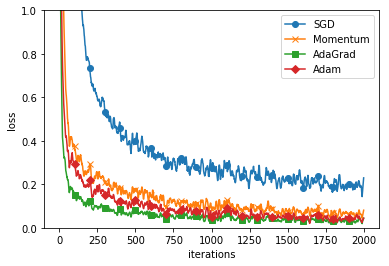

In [9]:
# coding: utf-8
import os
import sys
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import *


# 0. MNIST 데이터 읽기==========
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000


# 1. 실험용 설정==========
optimizers = {}
optimizers['SGD'] = SGD()
optimizers['Momentum'] = Momentum()
optimizers['AdaGrad'] = AdaGrad()
optimizers['Adam'] = Adam()
#optimizers['RMSprop'] = RMSprop()

networks = {}
train_loss = {}
for key in optimizers.keys():
    networks[key] = MultiLayerNet(
        input_size=784, hidden_size_list=[100, 100, 100, 100],
        output_size=10)
    train_loss[key] = []    


# 2. 훈련 시작==========
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    for key in optimizers.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizers[key].update(networks[key].params, grads)
    
        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)
    
    if i % 100 == 0:
        print( "===========" + "iteration:" + str(i) + "===========")
        for key in optimizers.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))


# 3. 그래프 그리기==========
markers = {"SGD": "o", "Momentum": "x", "AdaGrad": "s", "Adam": "D"}
x = np.arange(max_iterations)
for key in optimizers.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 1)
plt.legend()
plt.show()


In [ ]:
#overfitting 억제 범용성 높이는 테크닉 weight decay 기법 가중치 매개변수의 값이 작아지도록 학습 - 가중치 작게 하여 오버피팅 일어나지 않도록
#0.01 * np.random.randn(10,100) 
# 가중치 모두 0 으로 하면 올바로 학습 이루어지지 않는다. - 가중치 균일한 값 - 오차 균일한 값으로 설정하면 오차 역전파법에서 모든 가중치의 값이 똑같이 갱신


